In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar arquivo para um dataframe
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [3]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
# Verificar se os dados estão corretos
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [5]:
# A dimensão paciente não faz sentido para a nossa análise e podemos remover ela
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)


In [6]:
df_exames.head()

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [7]:
# A dimensão "genero" poderia ser trocada por um número, mas isso representaria um peso, que não é o caso
# Trocar por números funciona bem em casos que podem ser ordenados, como escolaridade por exemplo.
# Para trocar neste caso, de uma variável categórica de mesmo grau de importância, podemos fazer o "One-Hot Encoding"
# Ou seja, transformar a variável categórica em uma matriz de 0 e 1

df_exames = pd.get_dummies(df_exames, columns=["genero"], dtype='int64')
df_exames.head()

# Agora temos duas colunas numéricas, de mesmo peso para fazer nossa análise

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


<Axes: >

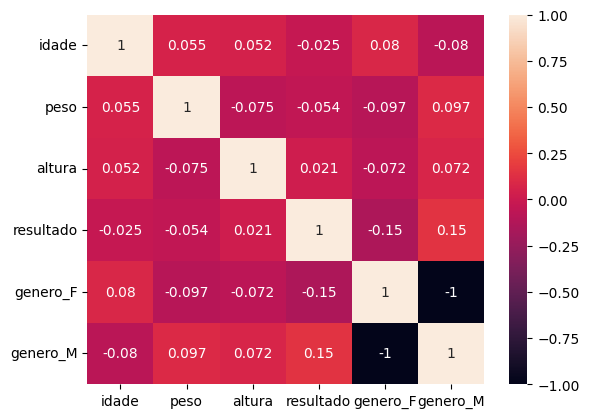

In [8]:
# Apresentar o mapa de calor com correlação entre variáveis

import seaborn as sns
sns.heatmap(df_exames.corr(), annot=True, vmax=1, vmin=-1)

<Axes: >

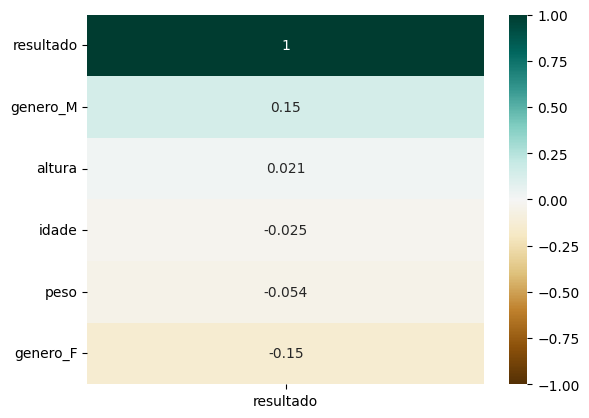

In [9]:
# Não temos nenhuma correlação aparente, em uma análise abrangente de toda a base
# Talvez em clusters de dados podemos ter, mas não em uma visão geral dos resultados dos exames

# Agora vamos fazer a mesma coisas só para o target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), annot=True, vmax=1, vmin=-1, cmap='BrBG')


array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


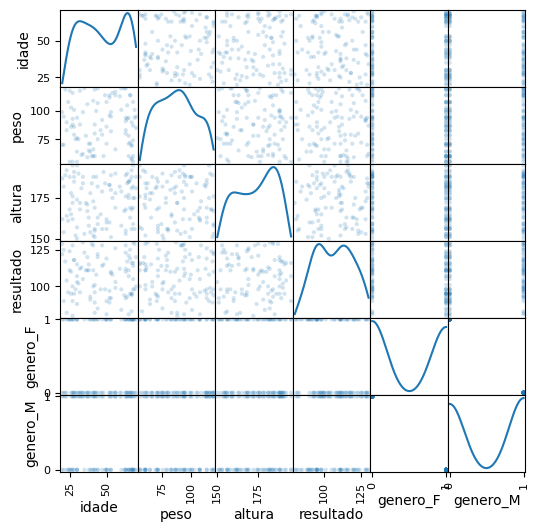

In [10]:
# Fica bem claro que nenhuma variável tem correlação direta com o resultado do exame, mesmo o genero masculino que tem o maior valor, ainda é bem baixo

# Outra análise que podemos fazer é uma dispersão com dispersão em um plot scatter

# kde, é como um histograma, mas com uma distribuição gaussiana (densidade)
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

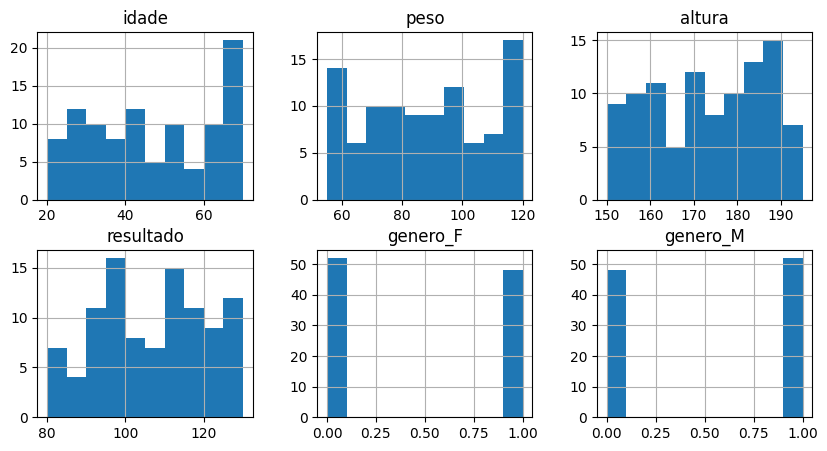

In [11]:
# Com a dispersão fica bem claro que não temos uma relação direta das variáveis com o resultado

# Histograma de todas as variáveis
df_exames.hist(layout=(2,3), figsize=(10,5))

In [12]:
# Criar uma feature nova, o IMC (Índice de Massa Corporal)
# IMC = peso (kg) / altura² (m)
# E com esta nova feature fazer uma nova analise dos dados

df_exames['imc'] = df_exames['peso'] / ((df_exames['altura']/100)  ** 2)
df_exames.head()


,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

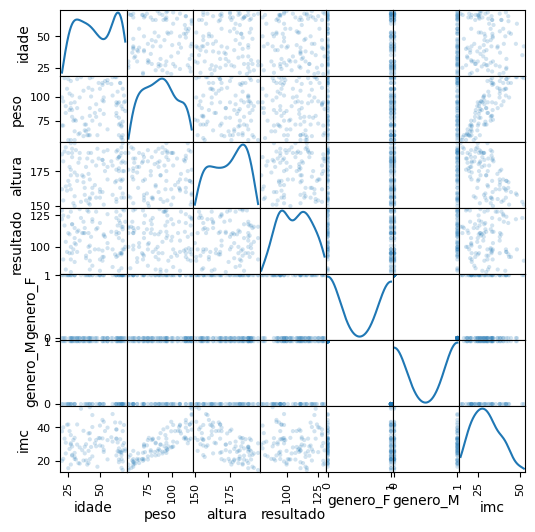

In [13]:
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [14]:
# Vamos fazer um exemplo de modelo de regressão linear

dict_regressao = {'tempo_casa': [1, 3, 6, 9, 10, 14, 18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)
df_regressao_simples

,tempo_casa,salario
0,1,1500
1,3,3000
2,6,4500
3,9,6000
4,10,7000
5,14,8500
6,18,10000


<Axes: xlabel='tempo_casa', ylabel='salario'>

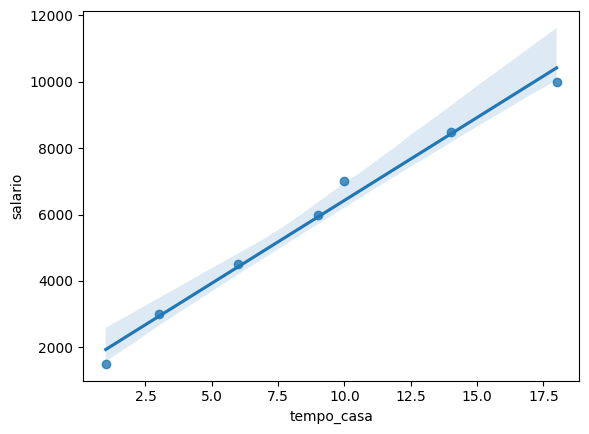

In [15]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')
# y = ax + b

Interceptor (b): 1434.3501326259934
Coeficiente angular (a): 499.3368700265256
Salário previsto para 12 anos de tempo_casa: 7426.392572944302


<Axes: xlabel='tempo_casa', ylabel='salario'>

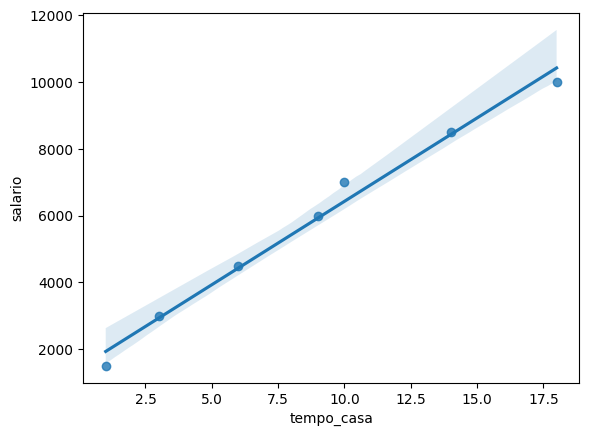

In [16]:
import statsmodels.api as sm

# Adiciona uma constante para o intercepto b
X = sm.add_constant(df_regressao_simples['tempo_casa'])
y = df_regressao_simples['salario']

# Ajuste do modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Obtenção dos coeficientes a e b
b, a = modelo.params
print(f'Interceptor (b): {b}')
print(f'Coeficiente angular (a): {a}')

# Previsão do salário para um tempo_casa específico
tempo_casa = 12
salario_previsto = a * tempo_casa + b
print(f'Salário previsto para {tempo_casa} anos de tempo_casa: {salario_previsto}')

# Visualização do ajuste da regressão
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

In [18]:
# Vamos agora usar o SciKit-Learn

# Importar as libs do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [19]:
# Modelo 1 - Sem IMC

# Convenção, X para variáveis independentes (classificadora) e y para variáveis resposta (previsão)
from sklearn.model_selection import train_test_split
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

# Dividir o conjunto de dados entre treino e teste
# o `random_state` é usado para garantir a reprodução do teste com mais consistência, garantindo os mesmos resultados de teste para outras pessoas rodarem o código.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

X_test

,idade,peso,altura,genero_F,genero_M
71,53,99,151,1,0
43,56,66,178,0,1
11,48,60,191,0,1
83,32,88,172,0,1
78,56,114,169,0,1
19,67,58,192,1,0
80,65,94,185,0,1
4,27,55,176,0,1
79,37,59,171,0,1
75,26,86,178,0,1


No contexto do uso do `train_test_split` da biblioteca `sklearn`, o parâmetro `random_state` é utilizado para garantir a reprodutibilidade da divisão dos dados em conjuntos de treino e teste. Vamos entender melhor como isso funciona e qual é a sua importância.

### Função `train_test_split`

A função `train_test_split` divide os dados fornecidos em dois conjuntos: um para treinamento do modelo e outro para teste do modelo. Os parâmetros principais que você passou para essa função são:

- `X`: DataFrame com as features (variáveis independentes).
- `y`: Série ou DataFrame com o target (variável dependente).
- `train_size=0.7`: Especifica que 70% dos dados devem ser usados para treino e 30% para teste.
- `random_state=51`: Valor da semente usada pelo gerador de números aleatórios.

### Uso do `random_state`

O `random_state` define a semente para o gerador de números aleatórios que a função usa para embaralhar e dividir os dados. Definir este parâmetro garante que, toda vez que você rodar o código, a divisão dos dados será exatamente a mesma. Isso é útil principalmente por dois motivos:

1. **Reprodutibilidade:** Outros pesquisadores ou desenvolvedores que rodarem o seu código obterão os mesmos resultados na divisão dos dados. Isso é fundamental para garantir que os resultados sejam consistentes e verificáveis.
   
2. **Consistência nos Experimentos:** Durante o desenvolvimento e teste de modelos, é comum precisar ajustar hiperparâmetros ou testar diferentes abordagens. Manter a mesma divisão dos dados ajuda a isolar as variáveis que você está testando, já que os conjuntos de treino e teste permanecem constantes.

### Exemplo de Uso do `train_test_split` com `random_state`

Abaixo está um exemplo completo do uso da função `train_test_split` com o `random_state`, juntamente com o treinamento e avaliação de um modelo de regressão linear:

```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Supondo que df_exames é o DataFrame com os dados
# Excluímos as colunas 'imc' e 'resultado' de X, e usamos 'resultado' como y
X = df_exames.drop(columns=['imc', 'resultado'])
y = df_exames['resultado']

# Dividimos os dados em treino e teste com uma semente aleatória
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

# Criamos o modelo de regressão linear
model = LinearRegression()

# Treinamos o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazemos previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliamos o modelo usando MAE e R²
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')
```

### O que acontece se não usarmos `random_state`

Se você não especificar `random_state`, a função `train_test_split` usará um gerador de números aleatórios diferente toda vez que for chamada, resultando em diferentes divisões dos dados em cada execução. Isso pode dificultar a reprodutibilidade e a comparação dos resultados entre diferentes execuções.

### Conclusão

O uso de `random_state` no `train_test_split` é uma prática recomendada para garantir que os experimentos sejam reprodutíveis e que as comparações entre diferentes abordagens ou modelos sejam justas e consistentes.

In [21]:
# Treinar o algoritmo de Regressão linear para o nosso Modelo 01
model_1 = LinearRegression().fit(X_train, y_train)

# Gerar predições do conjunto de testes com base no Modelo 1
y_pred_1 = model_1.predict(X_test)

# Lembrando da equação da reta em uma regressão linear
# y = a * x + b
# podemos calcular a e b com base no modelo:
a_1 = model_1.coef_
b_1 = model_1.intercept_

In [22]:
a_1

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [23]:
b_1

94.21133142019856

In [24]:
# Vamos para as métricas

# Começando com o R2 score
#   O R² Score (Coeficiente de Determinação) mede a proporção da variabilidade da 
#   variável dependente que é explicada pelo modelo de regressão, indicando o quão 
#   bem os dados se ajustam ao modelo, com valores variando de 0 a 1, 
#   onde 1 indica um ajuste perfeito.

# R2 Score no conjunto de treinamento
model_1.score(X_train, y_train)
# >> muito baixo

0.06218388634297234

In [26]:
# Agora o R2 Score no conjunto de testes
model_1.score(X_test, y_test)



-0.1364090447910642

> O modelo não performou, parece um underfitting 

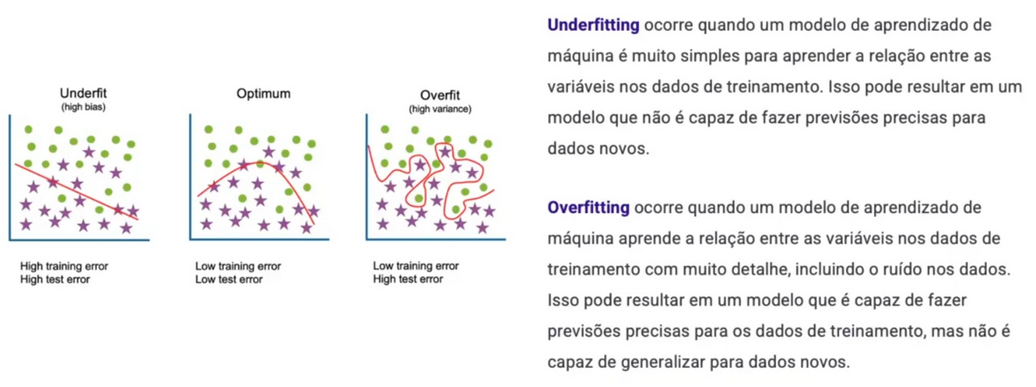

In [27]:
# Para ilustrar outra forma de calcular o R2 Score
r2_score(y_test, y_pred_1)

-0.1364090447910642

In [28]:
# Outra métrica importante, o MAE (Mean Absolute Error) é uma das métricas mais simples e fáceis de calcular. 
# Ela calcula a diferença absoluta entre os valores preditos e os valores reais, e calcula a média das diferenças absolutas.

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_1)

12.695569181179541

In [ ]:
# Mostra o tamanho do erro, no caso dos exames de diabetes, estamos falando de 
# termos resultados acima ou abaixo na grandeza de 12.69mg/dL
# o que poderia indicar de forma incorreta se o paciente tem diabetes ou não